In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [35]:
# Load CSV into pandas dataframe
alcohol_df = pd.read_csv("Resources/drinks.csv")

# Preview dataframe
alcohol_df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [36]:
# Clean df
alcohol_df = alcohol_df.rename(columns={"country":"Country", "beer_servings":"Beer Servings", "spirit_servings":"Spirit Servings", 
                                        "wine_servings":"Wine Servings", "total_litres_of_pure_alcohol":"Total Litres of Alcohol"})

# Preview df
alcohol_df.head()

,Country,Beer Servings,Spirit Servings,Wine Servings,Total Litres of Alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [37]:
# Create a total servings column by adding beer, wine and spirts servings
alcohol_df["Total Servings"] = alcohol_df["Beer Servings"] + alcohol_df["Spirit Servings"] + alcohol_df["Wine Servings"]

# Sort by total servings in descending order
alcohol_df = alcohol_df.sort_values(by="Total Servings", ascending=False)

alcohol_df.head()

,Country,Beer Servings,Spirit Servings,Wine Servings,Total Litres of Alcohol,Total Servings
3,Andorra,245,138,312,12.4,695
68,Grenada,199,438,28,11.9,665
45,Czech Republic,361,170,134,11.8,665
61,France,127,151,370,11.8,648
141,Russian Federation,247,326,73,11.5,646


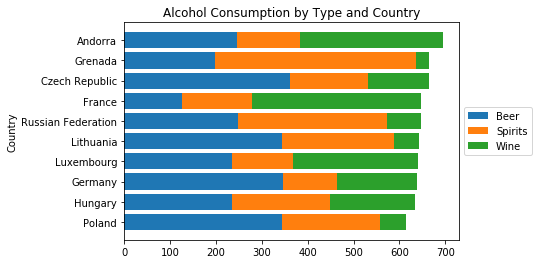

In [54]:
# Create horizontal bar charts to show which countries drink the most and least alcohol

# Set top 10 for testing
top10 = alcohol_df.head(10)

# Set y value and tick locations for Country column
y = top10["Country"]
country_number = top10["Country"].nunique()
ticks = np.arange(country_number)

# Set x values for servings columns
x1 = top10["Beer Servings"]
x2 = top10["Spirit Servings"]
x3 = top10["Wine Servings"]

# Create separate plots for each type of alcohol
beer = plt.barh(y, x1)
spirits = plt.barh(y, x2, left=x1)
wine = plt.barh(y, x3, left=x1 + x2)

plt.ylabel("Country")
plt.yticks(ticks)
plt.title("Alcohol Consumption by Type and Country")
plt.gca().invert_yaxis()
plt.legend((beer[0], spirits[1], wine[2]), ("Beer", "Spirits", "Wine"), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()